In [2]:
from __future__ import annotations
from utils_to_build_QAOAAnsatz import *
from info_dim6 import info_dim6

In [3]:
help(show_spectrum)

Help on function show_spectrum in module utils_to_study_an_instance:

show_spectrum(n, instance, k, fontsize=13, verbose=False)
    Shows the spectrum of an instance for a given value of k, including the energy of all states 
    and the energy of feasible states. Highlights the exact covers and minimal exact covers (MEC).
    
    Parameters
    ----------
    n : int
        The dimension of the instance.
    instance : int
        The index or identifier of the instance to consider.
    k : float
        The value of k chosen for the problem instance.
    verbose : bool, optional, default=False
        If True, additional print statements will be shown during the execution.
    fontsize : int, optional, default=13
        The fontsize to use in the figure.
    Example
    -------
    show_spectrum(10, 2, 1.0, verbose=True)



 L is 2


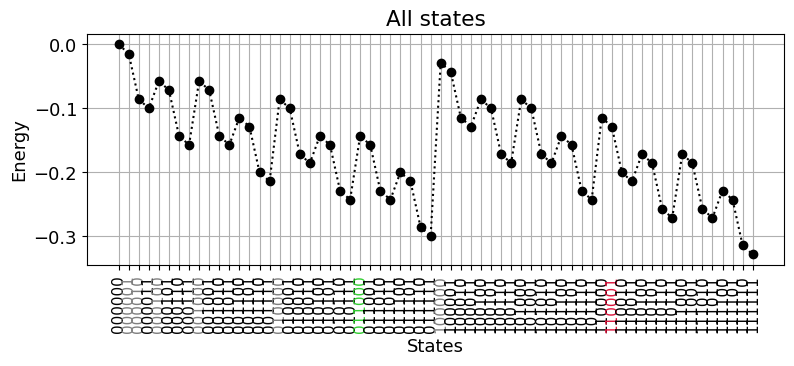

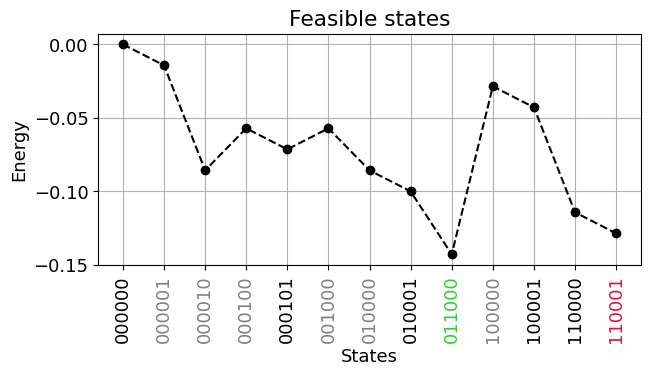

 L is 1


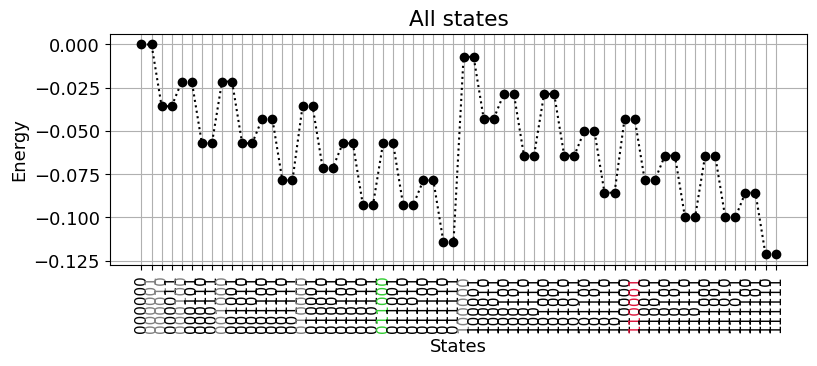

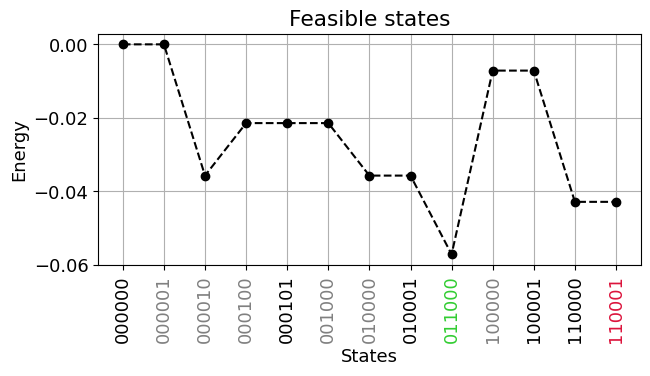

 L is 1


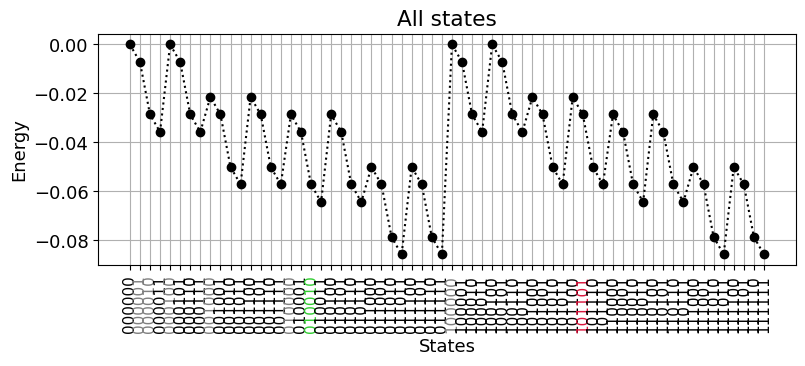

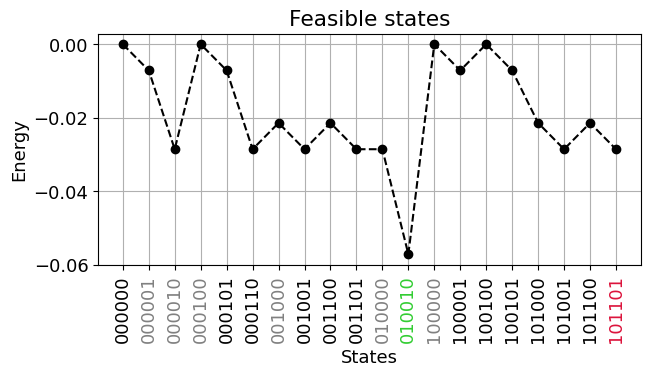

 L is 3


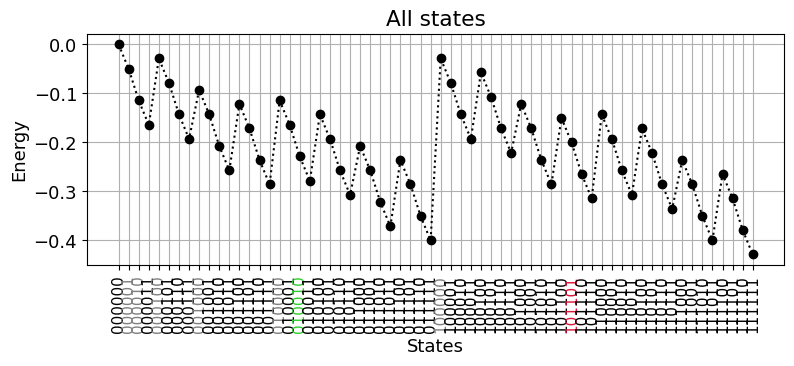

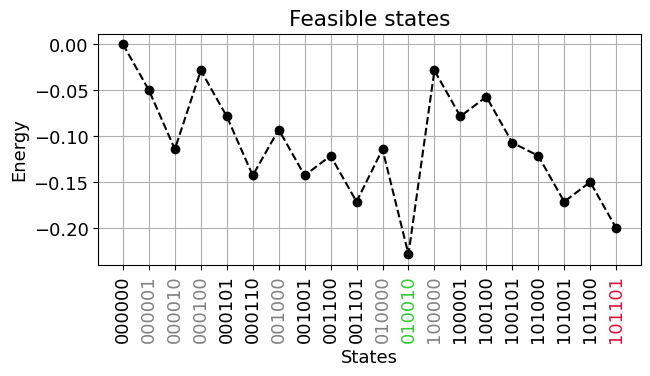

In [4]:
n = 6
instances = [3, 5]

for instance in instances:
    exact_covers = info_dim6[instance]["exact_covers"]
    L_list = [e.count("1") - 1 for e in exact_covers]
    for L in L_list:
        print(f" L is {L}")
        show_spectrum(n, instance, k_from_L(n, instance, L))

In [45]:
n = 6
instances = [3, 5]

for instance in instances:
    print(f"\n------------------")
    print(f"--- Instance {instance} ---")
    print(f"------------------")
    ec = info_dim6[instance]["exact_covers"]
    ec = sorted(ec, key=lambda x: x.count('1')) # Increasing number of '1'
    L_list = [e.count("1") - 1 for e in ec]

    U, subsets_dict = define_instance(n, instance, verbose=False)
    

    gap_list = []
    for L in L_list:
        print(f"\n--- L = {L} --- ")
        k = k_from_L(n, instance, L)    
            
        # Plot the spectrum.
        # show_spectrum(n, instance, k_from_L(n, instance, L))
        
        _, _, states_feas, energies_feas, _ = find_spectrum(U, subsets_dict, n, k)
        
        # Compute exact covers'energies.
        print("  Energies of MEC and exact covers:")
        for e in ec:
            print(f"  Energy({e}) = {compute_energy_Wang(e, U, subsets_dict, k)}")  
            
        # Sort energies and states to find ground state and 1st excited.
        sorted_pairs = sorted(zip(energies_feas, states_feas))

        energies_feas_sorted = [energy for energy, _ in sorted_pairs]
        states_feas_sorted = [state for _, state in sorted_pairs]
        
        
        
        if states_feas_sorted[0] == ec[0]:
            print("\n  ** THE GS IS THE MEC **")
        else:
            print("\n  ### THE GS IS NOT THE MEC ###")
        print(f"  GS: Energy({states_feas_sorted[0]}) = {energies_feas_sorted[0]}\n")
            
        if states_feas_sorted[1] != ec[0] and states_feas_sorted[1] in ec:
            print("  ** THE 1st excited IS AN EXACT COVER **")
        else:
            print("  ### THE 1st excited IS NOT AN EXACT COVER ###")
        print(f"  1st excited: Energy({states_feas_sorted[1]}) = {energies_feas_sorted[1]}\n")
        
            
        
        gap_gs_excited = abs(energies_feas_sorted[0]) - abs(energies_feas_sorted[1])
        print(f"\n  The gap gs-1st_excited is {gap_gs_excited}.")
        
        total_energy = abs(min(energies_feas) - max(energies_feas))
        print("  gap gs-1st_excited / total energy [%] :", gap_gs_excited/total_energy * 100)
        
        gap_list.append(gap_gs_excited)

    # plt.figure()
    # plt.plot(L_list, gap_list, marker='o', linestyle='--')
    # plt.ylim(min(gap_list), max(gap_list))
    # plt.show()


------------------
--- Instance 3 ---
------------------

--- L = 1 --- 
  Energies of MEC and exact covers:
  Energy(011000) = -0.05714285714285714
  Energy(110001) = -0.04285714285714286

  ** THE GS IS THE MEC **
  GS: Energy(011000) = -0.05714285714285714

  ### THE 1st excited IS NOT AN EXACT COVER ###
  1st excited: Energy(110000) = -0.04285714285714286


  The gap gs-1st_excited is 0.014285714285714284.
  gap gs-1st_excited / total energy [%] : 24.999999999999996

--- L = 2 --- 
  Energies of MEC and exact covers:
  Energy(011000) = -0.14285714285714285
  Energy(110001) = -0.12857142857142856

  ** THE GS IS THE MEC **
  GS: Energy(011000) = -0.14285714285714285

  ** THE 1st excited IS AN EXACT COVER **
  1st excited: Energy(110001) = -0.12857142857142856


  The gap gs-1st_excited is 0.01428571428571429.
  gap gs-1st_excited / total energy [%] : 10.000000000000004

------------------
--- Instance 5 ---
------------------

--- L = 1 --- 
  Energies of MEC and exact covers:
  E


------------------
--- Instance 1 ---
------------------

--- L = 3 --- 


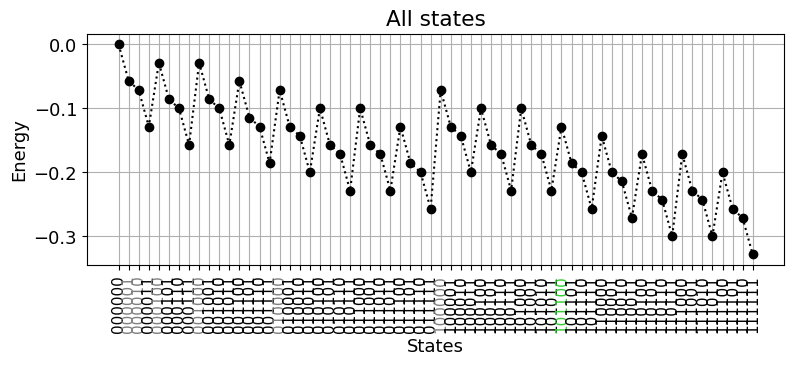

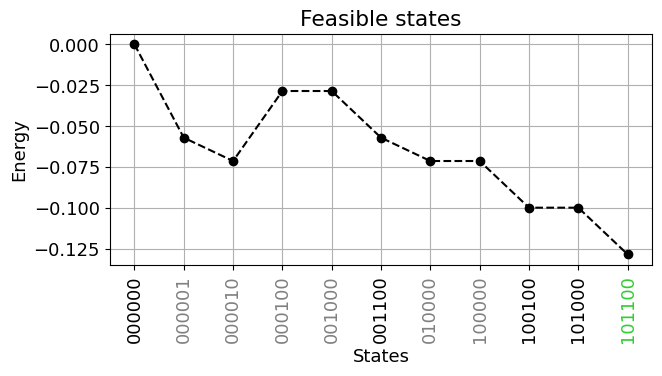

  gap gs-1st_excited / total energy [%] : 22.222222222222225

--- L = 2 --- 


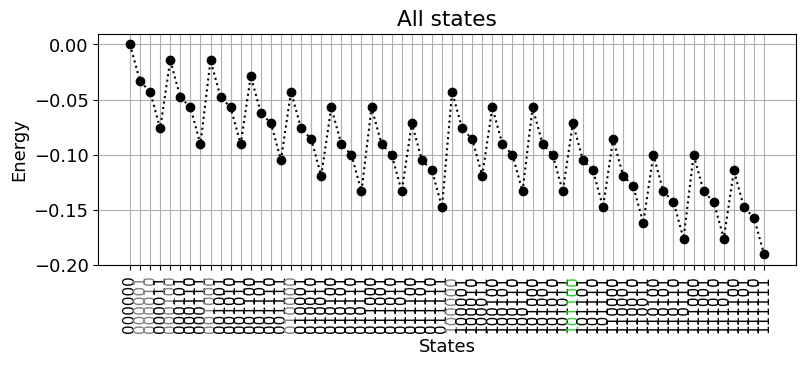

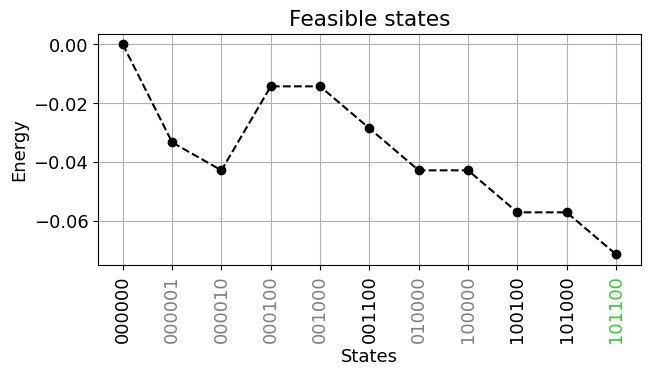

  gap gs-1st_excited / total energy [%] : 19.999999999999993

------------------
--- Instance 2 ---
------------------

--- L = 2 --- 


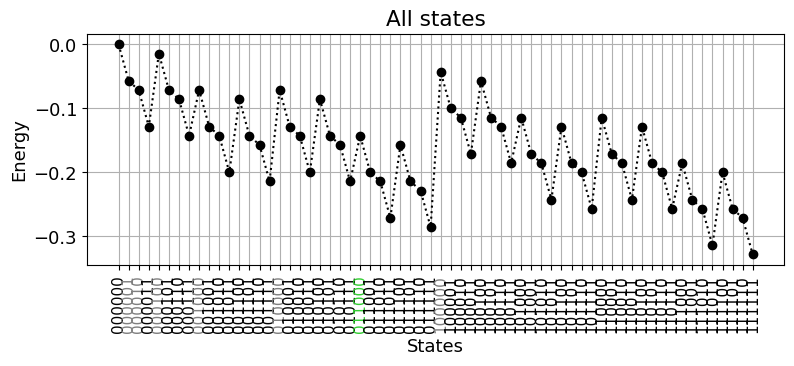

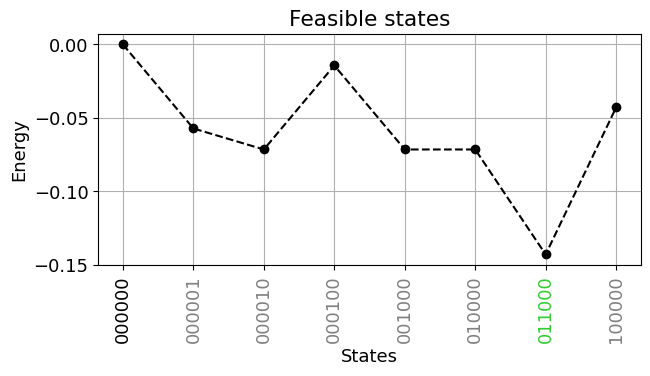

  gap gs-1st_excited / total energy [%] : 50.0

--- L = 1 --- 


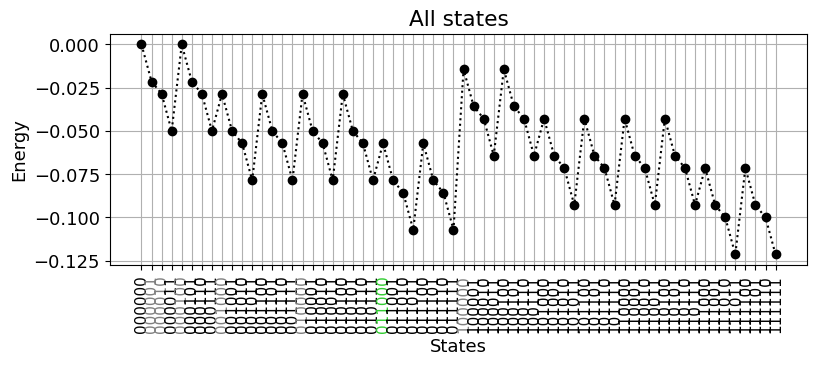

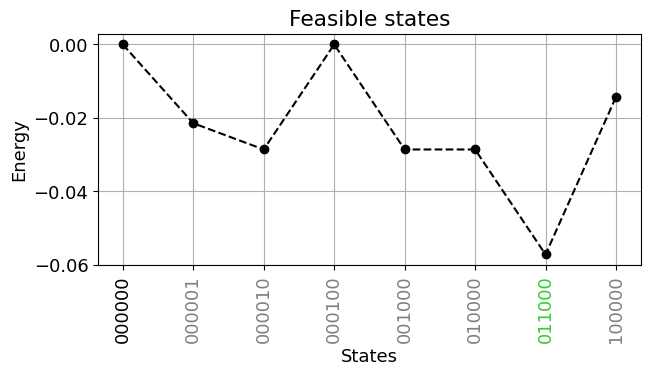

  gap gs-1st_excited / total energy [%] : 50.0

------------------
--- Instance 7 ---
------------------

--- L = 3 --- 


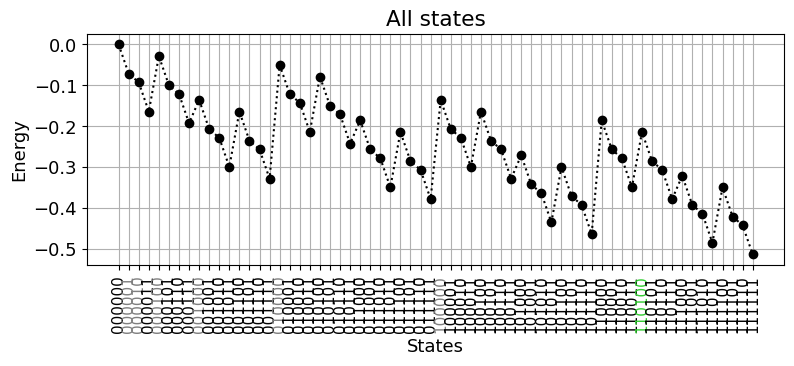

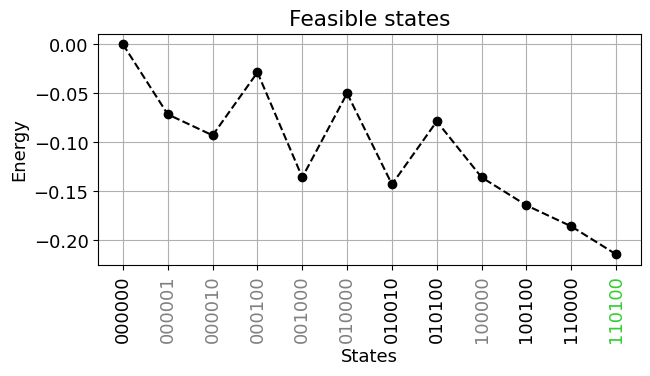

  gap gs-1st_excited / total energy [%] : 13.33333333333334

--- L = 2 --- 


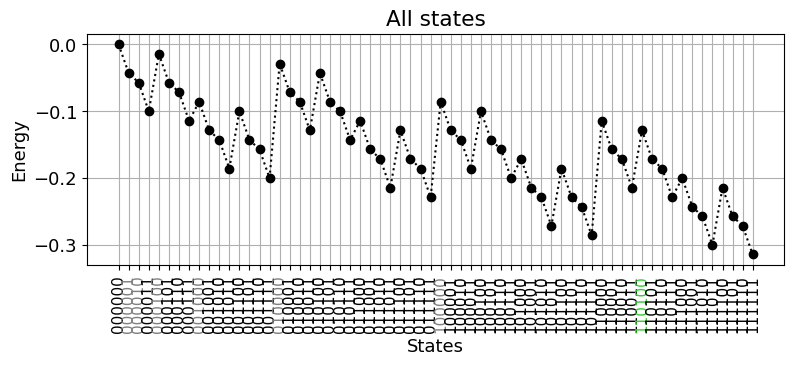

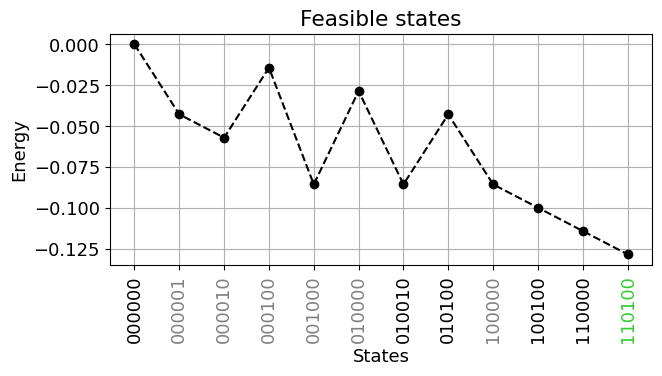

  gap gs-1st_excited / total energy [%] : 11.111111111111116

------------------
--- Instance 8 ---
------------------

--- L = 3 --- 


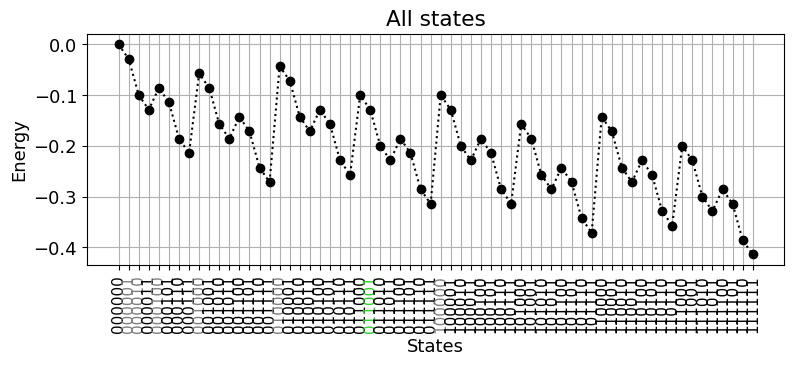

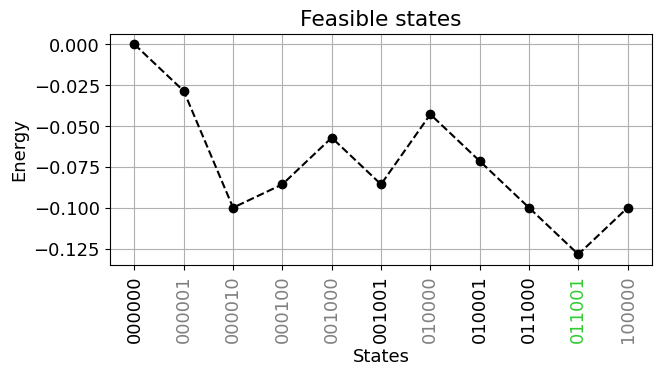

  gap gs-1st_excited / total energy [%] : 22.222222222222225

--- L = 2 --- 


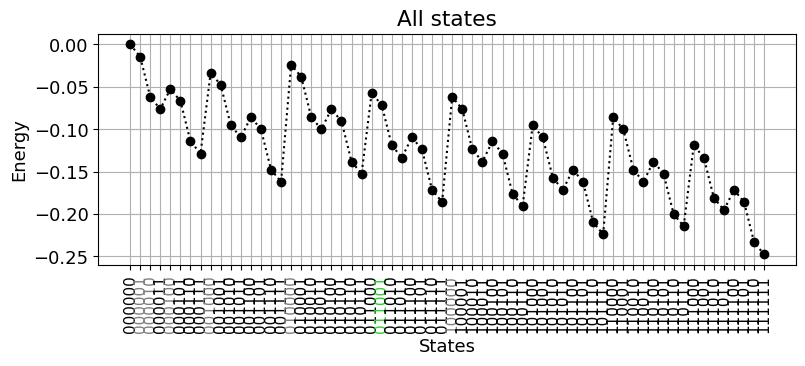

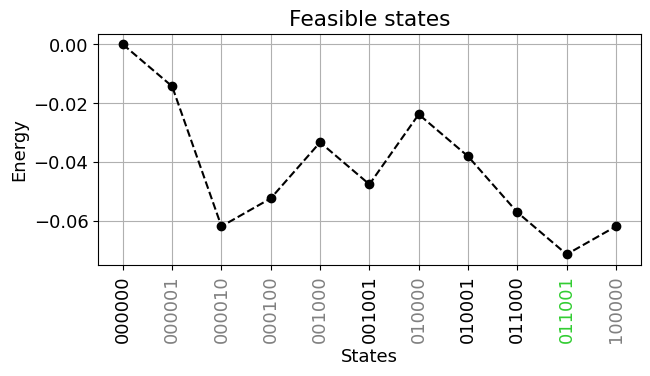

  gap gs-1st_excited / total energy [%] : 13.333333333333336

------------------
--- Instance 9 ---
------------------

--- L = 2 --- 


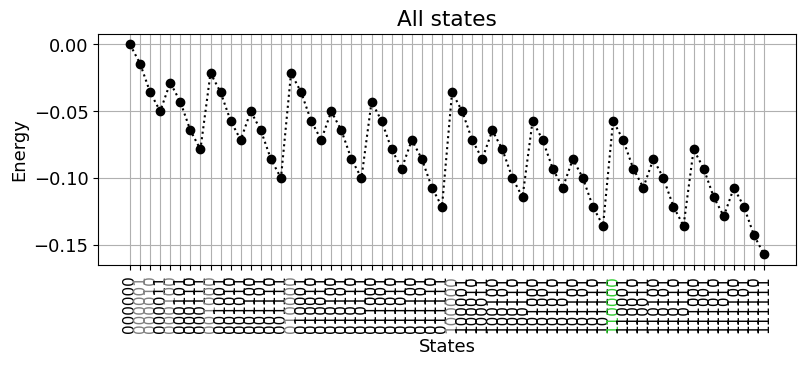

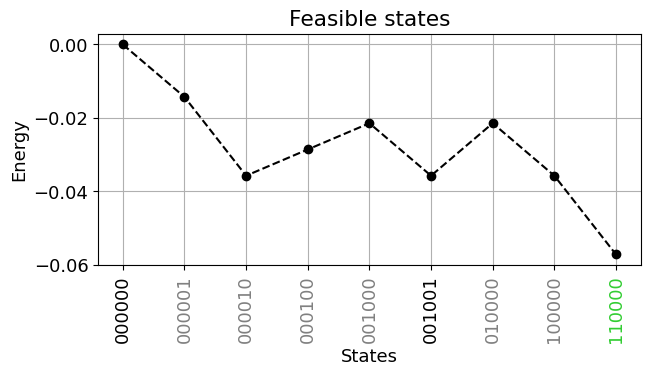

  gap gs-1st_excited / total energy [%] : 37.5

--- L = 1 --- 


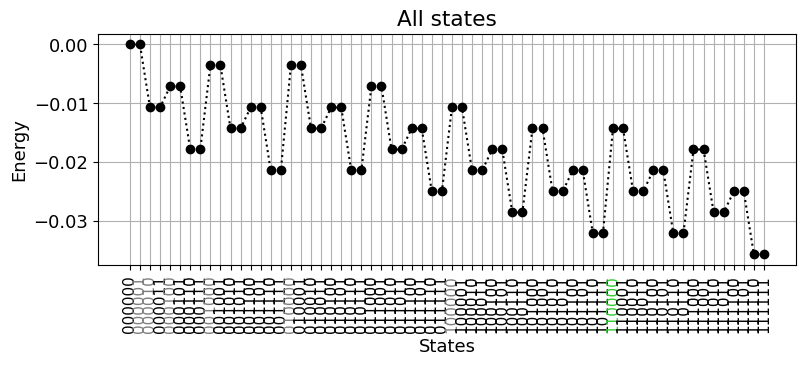

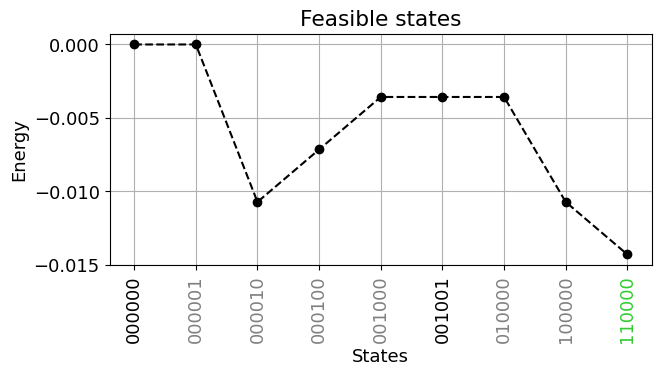

  gap gs-1st_excited / total energy [%] : 25.0

------------------
--- Instance 10 ---
------------------

--- L = 2 --- 


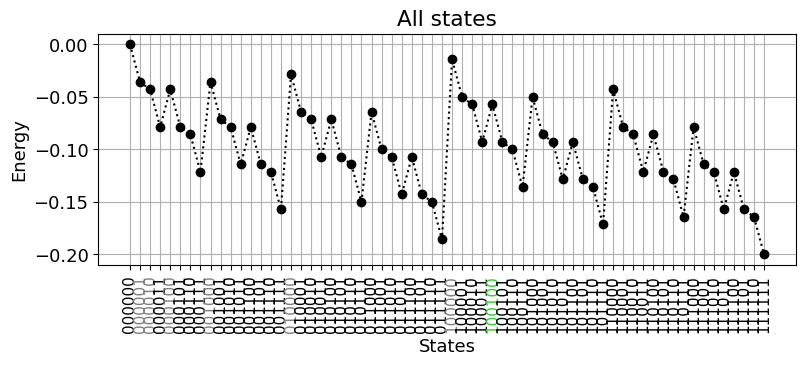

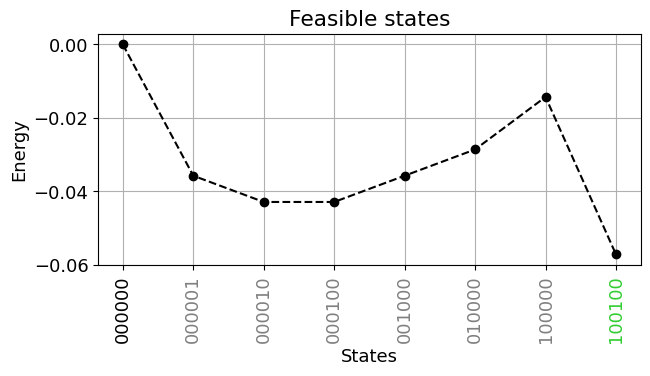

  gap gs-1st_excited / total energy [%] : 24.999999999999996

--- L = 1 --- 


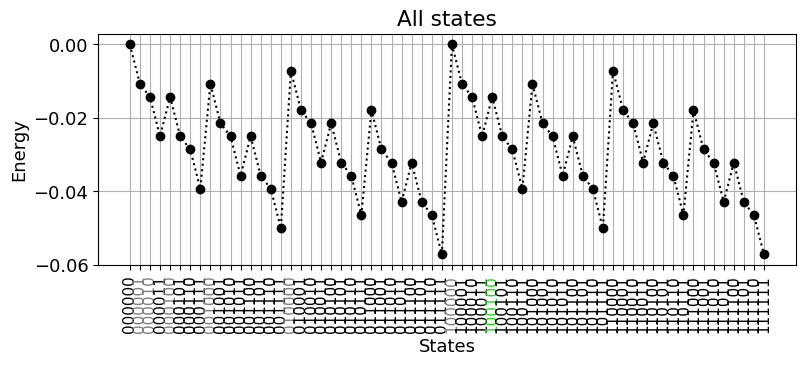

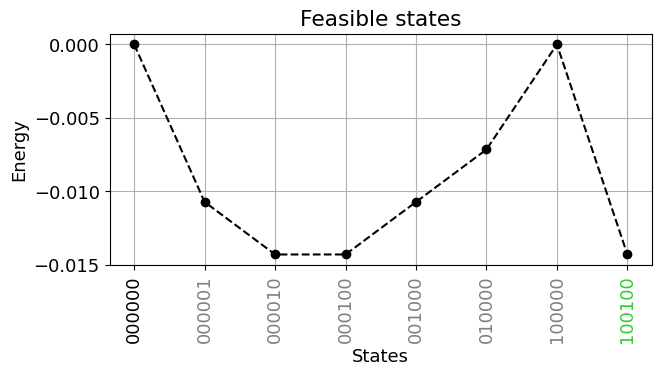

  gap gs-1st_excited / total energy [%] : 0.0


In [56]:
n = 6
instances = [1,2,7,8,9,10]

for instance in instances:
    print(f"\n------------------")
    print(f"--- Instance {instance} ---")
    print(f"------------------")
    ec = info_dim6[instance]["exact_covers"]
    ec = sorted(ec, key=lambda x: x.count('1')) # Increasing number of '1'
    L_list = [e.count("1") for e in ec] + [e.count("1") - 1 for e in ec]

    U, subsets_dict = define_instance(n, instance, verbose=False)
    

    gap_list = []
    for L in L_list:
        print(f"\n--- L = {L} --- ")
        k = k_from_L(n, instance, L) 
        # k = 1
            
        # Plot the spectrum.
        show_spectrum(n, instance, k_from_L(n, instance, L))
        
        _, _, states_feas, energies_feas, _ = find_spectrum(U, subsets_dict, n, k)
        
        # Compute exact covers'energies.
        # print("  Energies of MEC and exact covers:")
        # for e in ec:
            # print(f"  Energy({e}) = {compute_energy_Wang(e, U, subsets_dict, k)}")  
            
        # Sort energies and states to find ground state and 1st excited.
        sorted_pairs = sorted(zip(energies_feas, states_feas))

        energies_feas_sorted = [energy for energy, _ in sorted_pairs]
        states_feas_sorted = [state for _, state in sorted_pairs]
        
        
        
#         if states_feas_sorted[0] == ec[0]:
#             # print("\n  ** THE GS IS THE MEC **")
#         else:
#             # print("\n  ### THE GS IS NOT THE MEC ###")
#         print(f"  GS: Energy({states_feas_sorted[0]}) = {energies_feas_sorted[0]}\n")
            
#         if states_feas_sorted[1] != ec[0] and states_feas_sorted[1] in ec:
#             # print("  ** THE 1st excited IS AN EXACT COVER **")
#         else:
        #     print("  ### THE 1st excited IS NOT AN EXACT COVER ###")
        # print(f"  1st excited: Energy({states_feas_sorted[1]}) = {energies_feas_sorted[1]}\n")
        
            
        
        gap_gs_excited = abs(energies_feas_sorted[0]) - abs(energies_feas_sorted[1])
        # print(f"\n  The gap gs-1st_excited is {gap_gs_excited}.")
        
        
        total_energy = abs(min(energies_feas) - max(energies_feas))
        print("  gap gs-1st_excited / total energy [%] :", gap_gs_excited/total_energy * 100)
        
        gap_list.append(gap_gs_excited)
